ENRON DATASET - Identificando uma fraude através dos emails e dados financeiros da Enron

 A empresa Enron era uma empresa americana de energia, commodities e serviços com sede em Houston, Texas, que foi uma das maiores empresas dos Estados Unidos. Em 2002, a empresa entrou em colapso devido à grande quantidade de fraudes corporativas e contábeis. Seu colapso afetou milhares de funcionários e influenciou todo o sistema econômico ocidental.
 
 O objetivo deste projeto é usar dados financeiros e de e-mail dos executivos da empresa Enron, que foram liberados pelo governo dos EUA após a investigação efetuada, para chegar a um modelo preditivo que possa identificar pessoas possivelmente envolvidas na fraude. 



In [1]:
#!/usr/bin/python3

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import matplotlib
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt


### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']

### Load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "rb") )

C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print ('Numero de executivos no Dataset:', len(data_dict.keys()))


Numero de executivos no Dataset: 146


In [3]:
features_list

['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'director_fees']

In [3]:
poi = 0
for people in data_dict:
    if data_dict[people]['poi'] == 1:
        poi += 1
print ("Numero de pessoas de interesse (POI): ", poi)

Numero de pessoas de interesse (POI):  18


In [4]:
print (data_dict['BUY RICHARD B'])

{'salary': 330546, 'to_messages': 3523, 'deferral_payments': 649584, 'total_payments': 2355702, 'loan_advances': 'NaN', 'bonus': 900000, 'email_address': 'rick.buy@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': -694862, 'total_stock_value': 3444470, 'expenses': 'NaN', 'from_poi_to_this_person': 156, 'exercised_stock_options': 2542813, 'from_messages': 1053, 'other': 400572, 'from_this_person_to_poi': 71, 'poi': False, 'long_term_incentive': 769862, 'shared_receipt_with_poi': 2333, 'restricted_stock': 901657, 'director_fees': 'NaN'}


In [5]:
print (data_dict.values())

dict_values([{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'loan_advances': 'NaN', 'bonus': 600000, 'email_address': 'mark.metts@enron.com', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'from_poi_to_this_person': 38, 'exercised_stock_options': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 702, 'restricted_stock': 585062, 'director_fees': 'NaN'}, {'salary': 267102, 'to_messages': 'NaN', 'deferral_payments': 1295738, 'total_payments': 5634343, 'loan_advances': 'NaN', 'bonus': 1200000, 'email_address': 'NaN', 'restricted_stock_deferred': 'NaN', 'deferred_income': -1386055, 'total_stock_value': 10623258, 'expenses': 11200, 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 6680544, 'from_messages': 'NaN', 'other': 2660303, 'from_this_person_to_poi': 'NaN', 'poi': False, 'l

Vamos verificar a existencia de Nan's

In [6]:
data_nan =  pd.DataFrame.from_records(list(data_dict.values()))

In [7]:
data_nan.replace(to_replace='NaN', value=np.nan, inplace=True)

print (data_nan.isnull().sum())

print (data_nan.shape)
# print df.head()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64
(146, 21)


Temos 146 registros no arquivo. Desse total, 18 são classificados como pessoas de interesse, o que dá entre 12% a 13% do dataset.

Os dados estão classificados como Pessoas de Interesse (POI), 14 recursos financeiros e 6 recursos de e-mail.

Podemos ver também que todos os registros possuem valores Nan, sendo que muitos chegam quase ou mais que a metade do dataset.

#1 - Vamos procurar por Outliers

Text(0,0.5,'bonus')

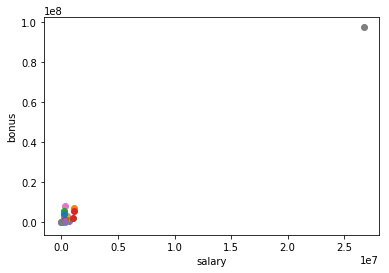

In [4]:
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [5]:
features

['salary', 'bonus']

Ao analisar os valores de Salário e Bonus anual dos executivos, encontramos um valor extremamente discrepante. Vamos analisar os principais valores para ver do que se trata e entender melhor os dados.

In [9]:
data_salary= []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    data_salary.append((key,int(val)))

print(sorted(data_salary,key=lambda x:x[1],reverse=True)[:5])


[('TOTAL', 26704229), ('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]


O valor discrepante é o 'TOTAL'. Como não se trata de nenhum dos executivos, vou removê-lo e verificar novamente o dataset.

In [10]:
data_dict.pop('TOTAL', 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [11]:

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

Text(0,0.5,'bonus')

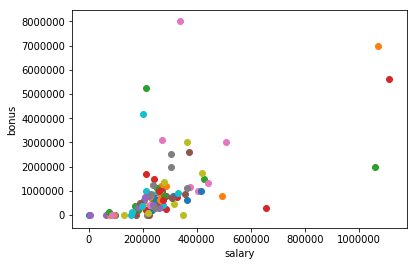

In [12]:
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")



Agora podemos ver alguns valores bem discrepantes, mas que foram realmente executivos da Enron. 

In [13]:
data_salary= []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    data_salary.append((key,int(val)))

print(sorted(data_salary,key=lambda x:x[1],reverse=True)[:5])


[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037), ('WHALLEY LAWRENCE G', 510364)]


Vamos analisar nosso dicionario visualmente, buscando alguma outra informação incorreta além do 'TOTAL'. 

In [14]:
data_dict.keys()


dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

Verificando os dados no dicionario, encontramos dois nomes suspeitos que devem ser analisados - THE TRAVEL AGENCY IN THE PARK e 'CHRISTODOULOU DIOMEDES'.
O primeiro realmente deve ser cancelado, pois não se trata de uma pessoa.
O segundo realmente é uma pessoa. Christodoulou é um nome de origem grega.
Desse modo, vamos retirar THE TRAVEL AGENCY IN THE PARK

In [15]:
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Vamos criar dois novos rotulos para analisar os dados.
Como visto em classe e por intuição, vamos usar a fração da quantidade de mensagens enviadas para POI's e a fração de mensagens recebidas de POI's de cada executivo.



In [16]:

def novo_dict(key,normalizer):
    nova_lista=[]
    for f in data_dict:
        if data_dict[f][key]=="NaN" or data_dict[f][normalizer]=="NaN":
            nova_lista.append(0.)
        elif data_dict[f][key]>=0:
            nova_lista.append(float(data_dict[f][key])/float(data_dict[f][normalizer]))
    return nova_lista

### create two lists of new features
from_poi_fraction =novo_dict("from_poi_to_this_person","to_messages")
to_poi_fraction =novo_dict("from_this_person_to_poi","from_messages")

count=0
for i in data_dict:
    data_dict[i]["from_poi_fraction"]=from_poi_fraction[count]
    data_dict[i]["to_poi_fraction"]=to_poi_fraction[count]
    count +=1


In [17]:
    
features_list = ["poi", "from_poi_fraction", "to_poi_fraction"]    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(data_dict, features_list)

### plot new features


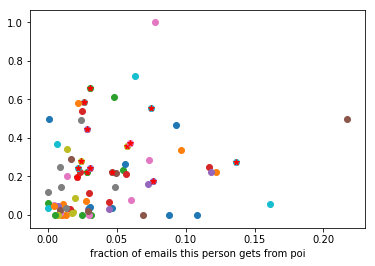

In [18]:

for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.show()

    


Como pode ser visto no grafico acima, estes rotulos não são muito eficientes sozinhos.
Vamos usá-los posteriormente em nossos classificadores para verificar seu valor em um algoritmo preditivo.

Vamos carregar a features_list novamente com todos os valores e guardar o dataset para facil exportação posterior.

In [39]:
features_list = ['poi','salary', 'to_messages', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred', 
                 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'from_poi_fraction', 'to_poi_fraction']

In [40]:

my_dataset = data_dict
data = featureFormat(data_dict, features_list)

Vamos utilizar os classificadores KbestNeighbors, Decision Tree, Gaussian NB e SVM.
inicialmente irei testar os classificadores com todas as features, apenas para fins de comparação.

In [41]:
from sklearn import cross_validation

labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.33, random_state=42)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

Estudando novamente as métricas de precision e recall e o classificador SVM, verifiquei que o parametro Average é necessário para destinos multiclasse. Neste caso, classificando como "average = 'macro'", as métricas para cada label são calculadas, e encontramos sua média não ponderada. Isso não leva em conta o desequilíbrio do label.

In [43]:

clf = GaussianNB()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)


print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.2916666666666667
Precisão: 0.13157894736842105
Recall: 0.8333333333333334


In [44]:
clf = KNeighborsClassifier(5)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("accuracy: ",acuracia)
print ("precision: ",precisao)
print ("recall: ",recall)

accuracy:  0.8958333333333334
precision:  1.0
recall:  0.16666666666666666


In [45]:
    clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("accuracy: ",acuracia)
print ("precision: ",precisao)
print ("recall: ",recall)

accuracy:  0.7291666666666666
precision:  0.23076923076923078
recall:  0.5


In [46]:
clf = SVC()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions, average = 'macro')
recall = recall_score(labels_test, predictions, average = 'macro')
print ("accuracy: ",acuracia)
print ("precision: ",precisao)
print ("recall: ",recall)

accuracy:  0.875
precision:  0.4375
recall:  0.5


C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Obtivemos excelentes resultados de acurácia com SVM, KNeighbors e Decision Tree,mas resultados ruins para Precisão e Recall, além de SVM ter recall zero
Vamos utilizar o algoritimo Select Kbest para determinar as melhores Features para otimizar as predições e obter melhores resultados de Acuracia, Precisão e Recall.

In [47]:
def  get_k_best (data_dict, features_list, k):

    data_kbest = featureFormat(data_dict, features_list)
    k_labels, k_features = targetFeatureSplit(data_kbest)

    k_best = SelectKBest(k=k)
    k_best.fit(k_features, k_labels)
    scores = k_best.scores_
    unsorted_pairs = zip(features_list[1:], scores)
    sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
    k_best_features = dict(sorted_pairs[:k])
    print ("{0} best features: {1}\n".format(k, k_best_features.keys()))
    print (k_best_features)
    return (k_best_features)

In [48]:

target_label = 'poi'
from sklearn.feature_selection import SelectKBest
num_features = 15
best_features = get_k_best(data_dict, features_list, num_features)


15 best features: dict_keys(['exercised_stock_options', 'total_stock_value', 'bonus', 'salary', 'to_poi_fraction', 'deferred_income', 'long_term_incentive', 'restricted_stock', 'total_payments', 'shared_receipt_with_poi', 'loan_advances', 'expenses', 'from_poi_to_this_person', 'other', 'from_poi_fraction'])

{'exercised_stock_options': 24.815079733218194, 'total_stock_value': 24.18289867856688, 'bonus': 20.792252047181535, 'salary': 18.289684043404513, 'to_poi_fraction': 16.409712548035788, 'deferred_income': 11.458476579280369, 'long_term_incentive': 9.922186013189823, 'restricted_stock': 9.2128106219771, 'total_payments': 8.77277773009168, 'shared_receipt_with_poi': 8.589420731682381, 'loan_advances': 7.184055658288725, 'expenses': 6.094173310638945, 'from_poi_to_this_person': 5.243449713374958, 'other': 4.187477506995375, 'from_poi_fraction': 3.1280917481567263}


Selecionei as 15 melhores Features para ter uma melhor noção de quais poderiam ser usadas.
Vamos testar os classificadores com as 4 melhores.


In [49]:
my_dataset = data_dict
features_list = ['poi', 'exercised_stock_options', 'total_stock_value', 'bonus', 'salary']
data = featureFormat(my_dataset, features_list)



In [50]:
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.33, random_state=42)


In [51]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)

print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.813953488372093
Precisão: 0.3333333333333333
Recall: 0.14285714285714285


In [52]:
clf = KNeighborsClassifier(3)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8372093023255814
Precisão: 0.5
Recall: 0.2857142857142857


In [53]:
clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.7674418604651163
Precisão: 0.2857142857142857
Recall: 0.2857142857142857


In [54]:
clf = SVC()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions, average = 'macro')
recall = recall_score(labels_test, predictions, average = 'macro')
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8372093023255814
Precisão: 0.4186046511627907
Recall: 0.5


C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Os valores de precisao e recall ficaram baixos para todos os classificadores.

Usando a intuição, vamos usar outras features e ver se alguma melhora.

In [89]:
features_list = [ 'poi','salary', 'bonus', 'from_poi_fraction', 'to_poi_fraction']

data = featureFormat(my_dataset, features_list)
labels, features = targetFeatureSplit(data)

features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.33, random_state=42)


In [90]:

clf = GaussianNB()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)


acuracia: 0.8333333333333334
Precisão: 0.3333333333333333
Recall: 0.2


In [91]:
clf = KNeighborsClassifier(5)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8611111111111112
Precisão: 0.5
Recall: 0.2


In [92]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8333333333333334
Precisão: 0.3333333333333333
Recall: 0.2


In [93]:
clf = SVC()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions, average = 'macro')
recall = recall_score(labels_test, predictions, average = 'macro')
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8611111111111112
Precisão: 0.4305555555555556
Recall: 0.5


C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Houve uma ligeira melhora na acuracia, mas uma queda no Recall.
Vamos melhorar os parametros dos classificadores SVM e Decision Tree, usando com GridSearchCV, afim de afinar os algoritmos.


In [94]:
from sklearn.model_selection import GridSearchCV



parameters = {}
clf_teste = SVC()
clf_teste = GridSearchCV(clf_teste, parameters)
clf_teste.fit(features, labels)

print (clf_teste.best_params_)
print (clf_teste.best_estimator_)

{}
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [95]:
parameters = {}
clf_teste = clf = DecisionTreeClassifier()
clf_teste = GridSearchCV(clf_teste, parameters)
clf_teste.fit(features, labels)

print (clf_teste.best_params_)
print (clf_teste.best_estimator_)

{}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [96]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions, average = 'macro')
recall = recall_score(labels_test, predictions, average = 'macro')
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8611111111111112
Precisão: 0.4305555555555556
Recall: 0.5


C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.75
Precisão: 0.25
Recall: 0.4


Tivemos uma boa melhora no Recall.

Houve um erro ao executar o SVM, informando que o máximo de iterações foi 100, e o estabelecido era 1000.
Sugeriram o uso dos algoritimos StandarScaler e MinMaxScaler.
Deste modo, vamos fazer o escalonamento das features implementando o algoritmo MinMaxScaler e testar os classificadores novamente.

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features= scaler.fit_transform(features)

In [99]:

clf = GaussianNB()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)


acuracia: 0.8333333333333334
Precisão: 0.3333333333333333
Recall: 0.2


In [100]:
clf = KNeighborsClassifier(leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=5,
           weights='uniform')
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)


acuracia: 0.8611111111111112
Precisão: 0.5
Recall: 0.2


In [101]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8055555555555556
Precisão: 0.375
Recall: 0.6


In [102]:
clf = SVC()
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions, average = 'macro')
recall = recall_score(labels_test, predictions, average = 'macro')
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.8611111111111112
Precisão: 0.4305555555555556
Recall: 0.5


C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Todos os algoritmos apresentaram uma melhora significativa, sendo o melhor no momento o Kneighbors.
Como já usei o GridSearchCV, vou ajustar os parametros dos algoritmos DecisionTree e SVM manualmente, e decidir pelo classificador final.


In [103]:
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_split= 6, max_depth=5)
clf.fit(features_train, labels_train)
clf.get_params

predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions)
print ("Acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

Acuracia: 0.8888888888888888
Precisão: 0.5714285714285714
Recall: 0.8


In [86]:
clf = SVC(max_iter=1000, kernel = 'linear', cache_size=500)
clf.fit(features_train, labels_train)
predictions = clf.predict(features_test)
acuracia = accuracy_score(labels_test, predictions)
precisao = precision_score(labels_test, predictions)
recall = recall_score(labels_test, predictions,average = 'macro')
print ("acuracia:", acuracia)
print ("Precisão:", precisao)
print ("Recall:", recall)

acuracia: 0.27906976744186046
Precisão: 0.14705882352941177
Recall: 0.45436507936507936


C:\Users\Samsung\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


CONCLUSÃO

Após testar os classificadores com o algoritmo StratifiedShuffleSplit fornecido para teste, concluimos que o melhor aproveitamento seria com o uso do algoritmo Decision Tree Classifier, com as features e configurações abaixo:

Features:  'poi','salary', 'bonus', 'from_poi_fraction', 'to_poi_fraction'
Configuração de parametros: criterion = 'entropy', min_samples_split= 6, max_depth=5

Apesar do uso dos algoritmos Select Kbest e GridSearchCV serem altamente indicados, obtive melhores resultados ao usar a intuição para escolha de features e estudo e muita tentativa e erro para paramentros.

Decision Tree Classifier:

Accuracy: 0.76636 - Precision: 0.38024 - Recall: 0.331  - F1: 0.35392   - F2: 0.33980 

Total predictions: 11000    	    
True positives:  535   
False positives:  960  
False negatives: 1465  
True negatives: 8040 		


Os resultados acima mostram que:

Precisão: a probabilidade de que uma pessoa identificada como um POI seja realmente um POI é de 38%, e temos 62% de chances de uma pessoa classificada como POI ser inocente, um falso positivo.

Recall: a probabilidade do identificador sinalizar um POI no conjunto de testes é de 33%, e 67% das vezes o POI não seria rotulado.

Os resultados estão dentro do minimo esperado, mas não são excelentes.

Para melhorar a analise, acredito que deveria analisar mais os dados de email e/ou dados financeiros, talvez criando features com 'total payments', 'stock values' e 'salary', ou analisar os textos para encontrar padrões nas conversas.




In [104]:
dump_classifier_and_data(clf, my_dataset, features_list)

In [105]:
#!/usr/bin/python3

""" a basic script for importing student's POI identifier,
    and checking the results that they get from it 
 
    requires that the algorithm, dataset, and features list
    be written to my_classifier.pkl, my_dataset.pkl, and
    my_feature_list.pkl, respectively

    that process should happen at the end of poi_id.py
"""

import pickle
import sys
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print("Warning: Found a predicted label not == 0 or 1.")
                print("All predictions should take value 0 or 1.")
                print("Evaluating performance for processed predictions:")
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print(clf)
        print(PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5))
        print(RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives))
        print("")
    except:
        print("Got a divide by zero when trying out:", clf)

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    pickle.dump(clf, open(CLF_PICKLE_FILENAME, "wb") )
    pickle.dump(dataset, open(DATASET_PICKLE_FILENAME, "wb") )
    pickle.dump(feature_list, open(FEATURE_LIST_FILENAME, "wb") )

def load_classifier_and_data():
    clf = pickle.load(open(CLF_PICKLE_FILENAME, "rb") )
    dataset = pickle.load(open(DATASET_PICKLE_FILENAME, "rb") )
    feature_list = pickle.load(open(FEATURE_LIST_FILENAME, "rb"))
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.78127	Precision: 0.38347	Recall: 0.33400	F1: 0.35703	F2: 0.34285
	Total predictions: 11000	True positives:  668	False positives: 1074	False negatives: 1332	True negatives: 7926

